# REGRESSION MODELLING FOR HOUSE SALES

![House Image](images/breno-assis-r3WAWU5Fi5Q-unsplash-edited1.jpg)

Photo by <a href="https://unsplash.com/@brenoassis?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Breno Assis</a> on <a href="https://unsplash.com/s/photos/housing?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

## PROJECT OVERVIEW

In this project, we will use Regression Modelling to Analyse House Sales for our stakeholder.

## BUSINESS UNDERSTANDING

**Zillow Inc** has just received a new Branch manager for its NorthWestern Market. The new branch manager is a believer in using data science and analytics to help better customers' experiences, and so he has reached out to our Data Analytics Consultancy firm, **ABC Data Analytics** to help find a way to help Home owners buy/sell their homes.

After several discussions with the Data Science team, we have decided that we will come up with a way to estimate the value of of customers homes.

Our algorithm will be able to help in:
* **Predictively** - The algorithm should be able to estimate the current value of the house.

## DATA UNDERSTANDING

In this Project we will use a dataset from the King County House Sales. The Data contains **21597 data points (rows)** of data on the House sales, Containing **21 attributes/Features (columns)** about each house.

Some of the cells in the data are missing values or incomplete, and so some data cleaning and formating will need to be done before we can work with this dataset.

After some EDA on the data, we might drop some columns, or add new ones depending on the needs of the project, and probably normalize the dataset before fitting it in our model.

### Column Names and descriptions for Kings County Data Set
* **id** - unique identified for a house
* **dateDate** - (numeric) date of sale
* **pricePrice** -  (numeric) sale price
* **bedroomsNumber** -  (numeric) of Bedrooms/House
* **bathroomsNumber** -  (numeric) of bathrooms/bedrooms
* **sqft_livingsquare** -  (numeric) size of the living space
* **sqft_lotsquare** -  (numeric) size of the property
* **floorsTotal** -  (numeric) floors (levels) in house
* **waterfront** - (numeric) binary indicator for a waterfront view
* **view** - (numeric) An index from 0 to 4 of how good the view of the property was
* **condition** - (factor) How good the condition is (poor to very good)
* **grade** - Classification by construction quality which refers to the types of materials used and the quality of workmanship. Buildings of better quality (higher grade) cost more to build per unit of measure and command higher value. Grades run from grade 1 to 13
* **sqft_above** - square footage of house apart from basement
* **sqft_basement** - square footage of the basement
* **yr_built** - Built Year
* **yr_renovated** - Year when house was renovated
* **zipcode** - zip
* **lat** - Latitude coordinate
* **long** - Longitude coordinate
* **sqft_living15** - The square footage of interior housing living space for the nearest 15 neighbors
* **sqft_lot15** - The square footage of the land lots of the nearest 15 neighbors

## DATA PREPARATION

In [294]:
# import the necessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# linear regression imports
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

Lets load out data into the work space

In [343]:
# load our data
df = pd.read_csv('./data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [345]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Data Cleaning

From our data overview, we can see that **waterfront**, **view** and **yr_renovated** have missing values.

Some of our data is also not in the required datatype, these include:
* **date** - is an object instead of a date datatype
* **sqft_basement** - is an object, but from our domain knowledge, it should be a numeric datatype

Lets do some adjustments to these identified issues before proceeding.

In [346]:
# convert the data type for date column to date datetype
df['date'] = df['date'].astype('datetime64[ns]')

In [347]:
# convert our sqft_basement to integer
df['sqft_basement'].value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
1852.0        1
666.0         1
276.0         1
2300.0        1
1245.0        1
Name: sqft_basement, Length: 304, dtype: int64

we can see that the sqft_basement column has a few column with NaN represented using a question mark(?), lets convert these values to 0

In [348]:
# replace the '?' with zero
df['sqft_basement'].replace({'?': 0}, inplace=True)

# convert column to integer
df['sqft_basement'] = df['sqft_basement'].astype(float)
df.sqft_basement.value_counts()


0.0       13280
600.0       217
500.0       209
700.0       208
800.0       201
          ...  
915.0         1
295.0         1
1281.0        1
2130.0        1
906.0         1
Name: sqft_basement, Length: 303, dtype: int64

With that out of the way, lets work on the missing values

In [349]:
df.waterfront.unique()

array([nan,  0.,  1.])

In [350]:
# Waterfront seems to be a column with two values, 
# 0 for houses with waterfronts and 1 for houses without water fronts, but also a coouple of missing values
#  let's convert the missing values to 0
df['waterfront'].fillna(0, inplace=True)
df.waterfront.unique()


array([0., 1.])

In [351]:
#  Lets now work on view
df['view'].unique()

array([ 0., nan,  3.,  4.,  2.,  1.])

view is the column that tells us the rating of how good the view of the house was,we shall fill these missing values with the mode, which is 0

In [352]:
df['view'].fillna(0, inplace=True)
df.view.unique()

array([0., 3., 4., 2., 1.])

In [353]:
df['yr_renovated'].unique()

array([   0., 1991.,   nan, 2002., 2010., 1992., 2013., 1994., 1978.,
       2005., 2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990.,
       1988., 1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989.,
       2004., 1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971.,
       1979., 1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008.,
       1968., 2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955.,
       1982., 1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957.,
       1959., 1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [354]:
# convert our nan to zero
df['yr_renovated'].fillna(0, inplace=True)
df.yr_renovated.unique()

array([   0., 1991., 2002., 2010., 1992., 2013., 1994., 1978., 2005.,
       2003., 1984., 1954., 2014., 2011., 1983., 1945., 1990., 1988.,
       1977., 1981., 1995., 2000., 1999., 1998., 1970., 1989., 2004.,
       1986., 2007., 1987., 2006., 1985., 2001., 1980., 1971., 1979.,
       1997., 1950., 1969., 1948., 2009., 2015., 1974., 2008., 1968.,
       2012., 1963., 1951., 1962., 1953., 1993., 1996., 1955., 1982.,
       1956., 1940., 1976., 1946., 1975., 1964., 1973., 1957., 1959.,
       1960., 1967., 1965., 1934., 1972., 1944., 1958.])

In [355]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  float64       
 9   view           21597 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  float64       
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

With all these out of the way, let's check to see for duplicate values in our dataset. Because our dataset in about sales, what if a house has been sold more than once? probably all these interactions have been included in our data set. Let's check if this might be the case.

In [356]:
df['id'].duplicated().value_counts()

False    21420
True       177
Name: id, dtype: int64

We can see that we have some duplicate values in our dataset. Let's dig deeper into that.

In [357]:
df[df['id'].duplicated(keep=False)]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0.0,0.0,...,8,1290,290.0,1939,0.0,98117,47.6870,-122.386,1570,4500
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0.0,3.0,...,11,2690,1600.0,1997,0.0,98006,47.5503,-122.102,3860,11244
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0.0,0.0,...,6,960,280.0,1922,1984.0,98146,47.4957,-122.352,1820,7460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0.0,0.0,...,8,2680,0.0,2013,0.0,98045,47.4759,-121.734,2680,5992
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0.0,0.0,...,7,1200,0.0,1933,0.0,98133,47.7076,-122.342,1130,1598
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0.0,0.0,...,9,2780,0.0,2013,0.0,98065,47.5184,-121.886,2850,6000


We'll keep the last sale info of the house, because that is the most recent representation of the value in the dataset, and drop all the rest.

In [358]:
# drop duplicates
df.drop_duplicates(subset=['id'], keep='last', inplace=True)
df['id'].duplicated().value_counts()

False    21420
Name: id, dtype: int64

Let's plot our data to see if our dataset is being affected by extreme outliers that might emmensely affect our analysis. 

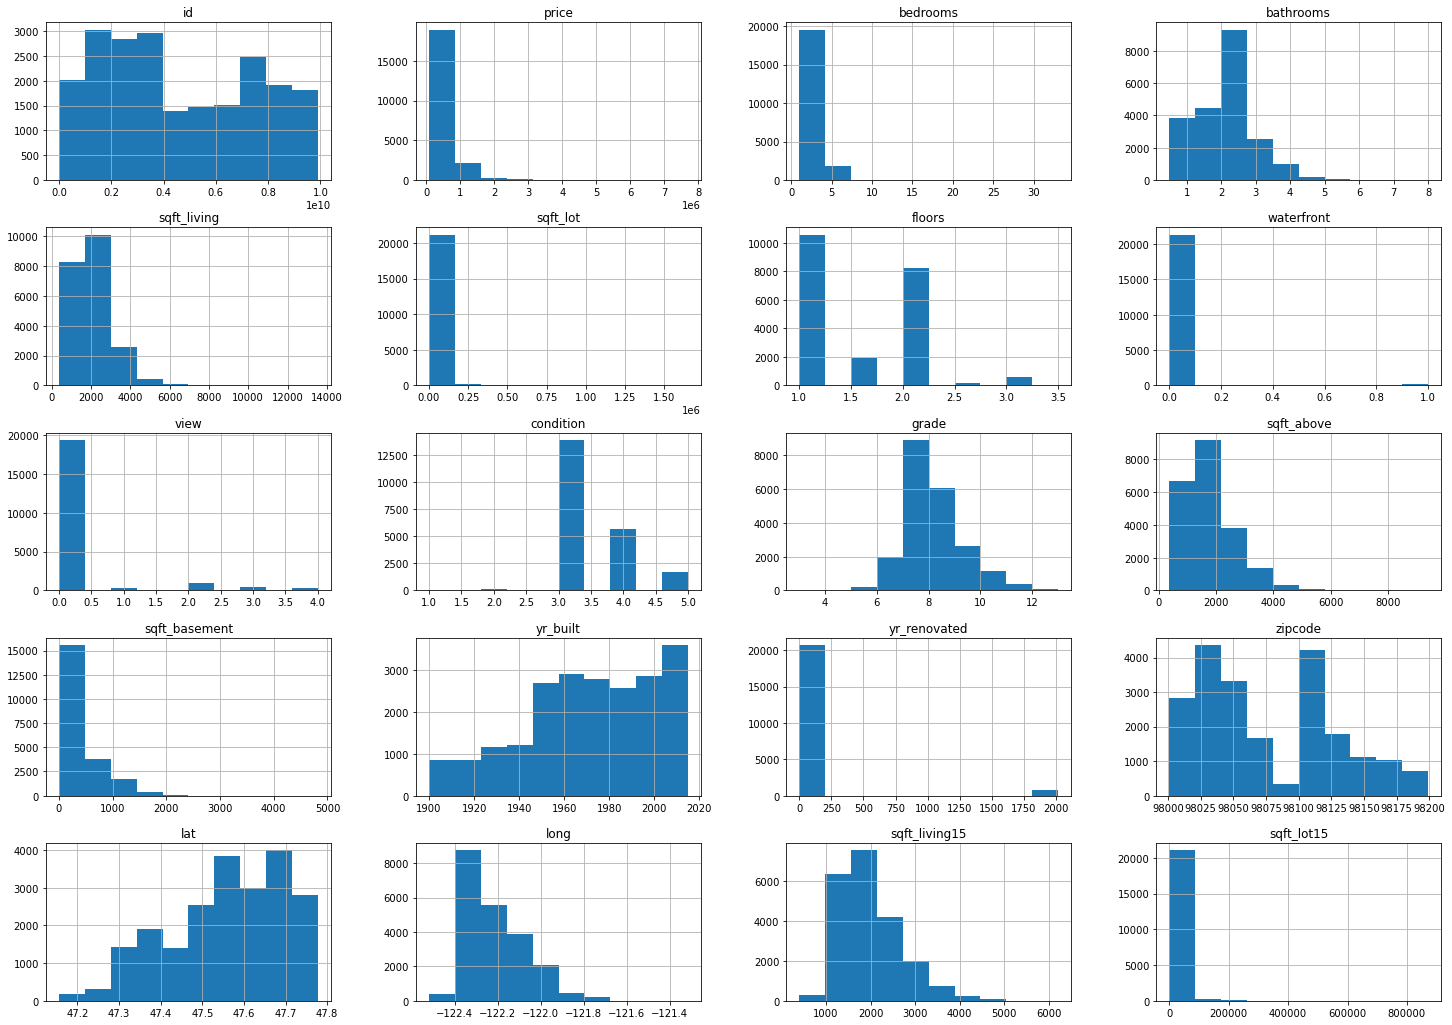

In [359]:
fig = plt.figure(figsize = (25,18))
ax = fig.gca()
df.hist(ax = ax);

From our graph, we can see that **price**, **sqft_lot**, **bedrooms** have some extreme outtliers that might affect our analysis. a better look into them might be helpful.

### Cleaning Price feature

We will clean all our columns starting from **Price**

In [360]:
df['price'].value_counts()

450000.0    172
350000.0    167
550000.0    157
500000.0    151
425000.0    149
           ... 
234975.0      1
804995.0      1
870515.0      1
336950.0      1
884744.0      1
Name: price, Length: 3595, dtype: int64

Let's plot price to see how it is distributed

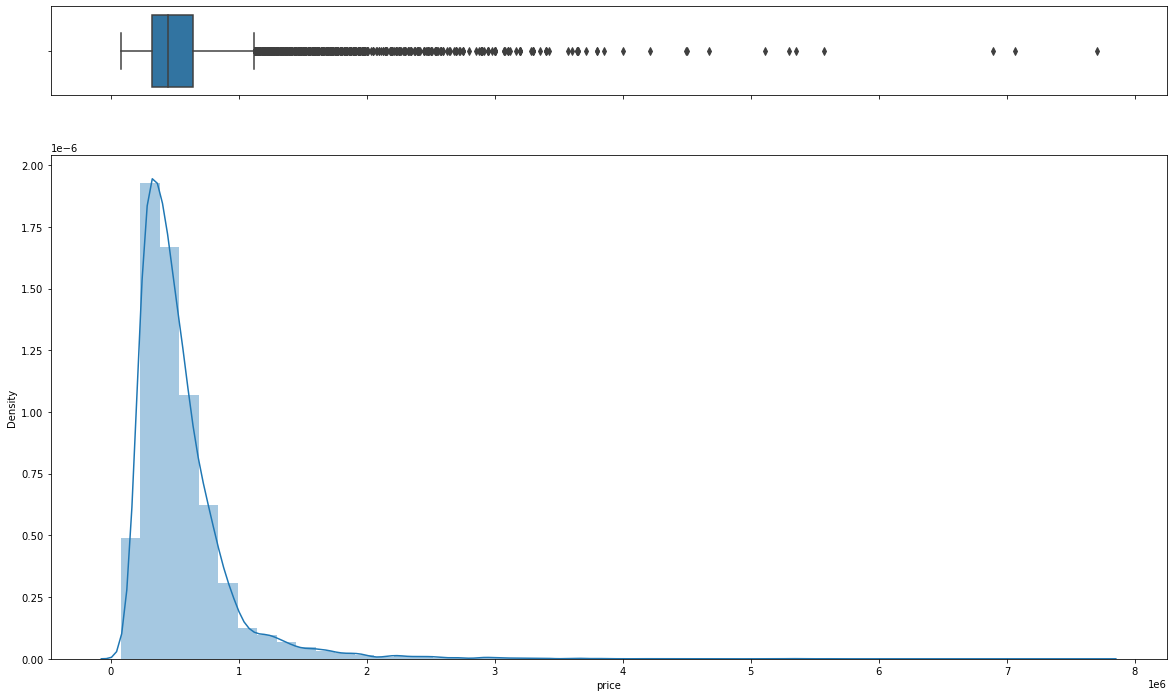

In [361]:
def check_boxplot_and_distplot(data, column):
    """Check for outliers using boxplot and distplot"""

    # creating a figure composed of two matplotlib.Axes objects (ax_box and ax_dist)
    f, (ax_box, ax_dist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)}, figsize=(20,12))
    
    # assigning a graph to each ax
    sns.boxplot(data[column], ax=ax_box)
    sns.distplot(data[column], ax=ax_dist)
    
    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')

check_boxplot_and_distplot(df, 'price')

We can see from the long tail of our target feature (price), that we have outliers in our dataset , and we'll make a judgement call and use values below 6Million

In [362]:
df_v1 = df.loc[df['price'] <= 6000000]
df_v1

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,0.0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


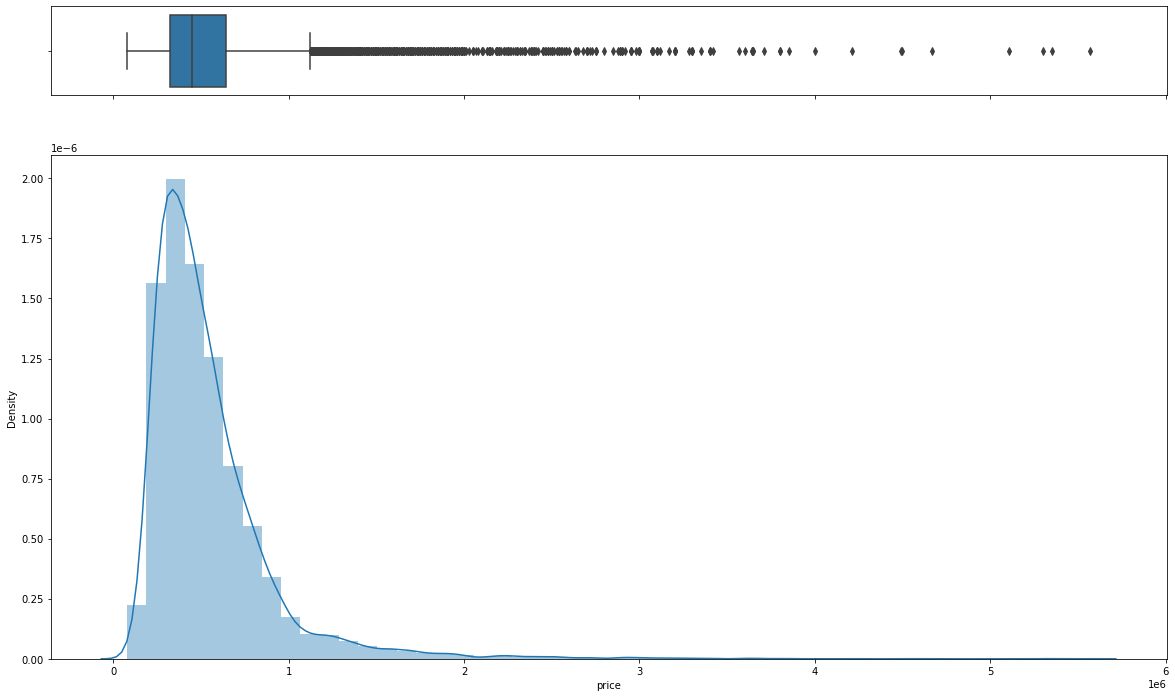

In [363]:
check_boxplot_and_distplot(df_v1, 'price')

### Cleaning Bedrooms feature

Let's look at bedrooms to see if it needs any cleaning

In [364]:
df_v1.bedrooms.value_counts()

3     9731
4     6849
2     2736
5     1585
6      263
1      191
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

We see we have a house with upto 33 bedrooms. that seems suspecious, let's have a look at that more.

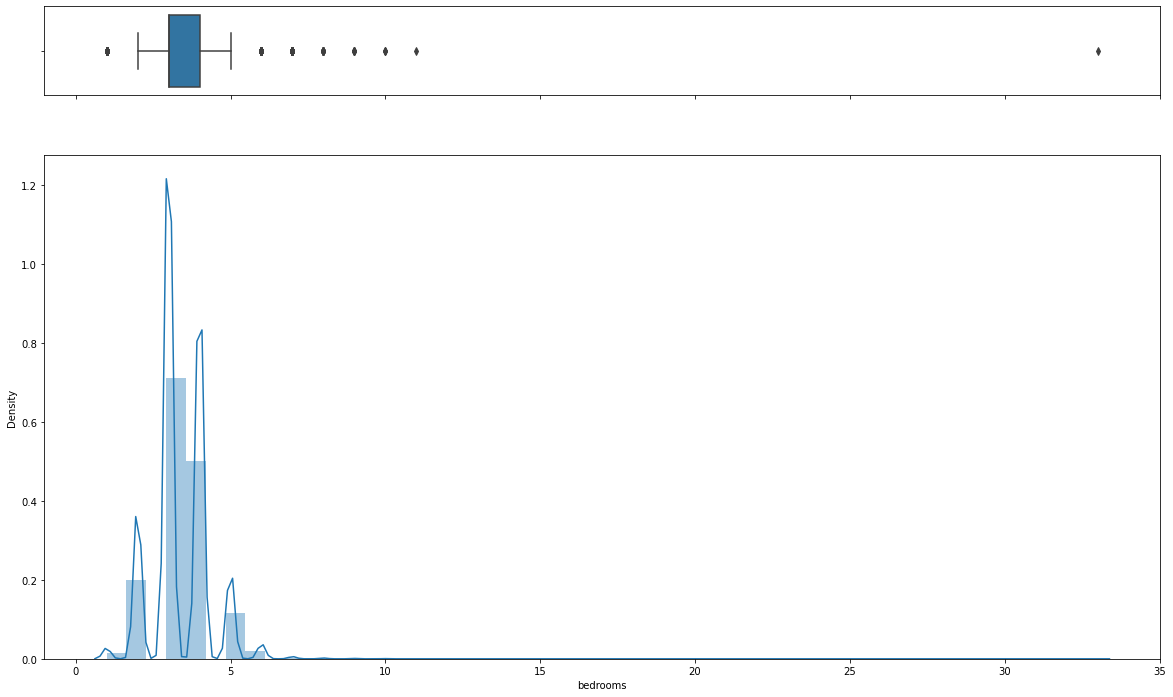

In [365]:
check_boxplot_and_distplot(df_v1, 'bedrooms')

In [366]:
df_v1[df_v1['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0.0,0.0,...,7,1040,580.0,1947,0.0,98103,47.6878,-122.331,1330,4700


From our domain knowledge reasoning, we expect homes to have a reasonable bedroom to bathroom ratio, this particular data point goes against this reasoning by having 33 bedrooms and only 1.75 bathrooms, and also because its just one datapoint, we will consider it a typing error, and reason that the data was intended to be 3 and not 33, and thus correct this.

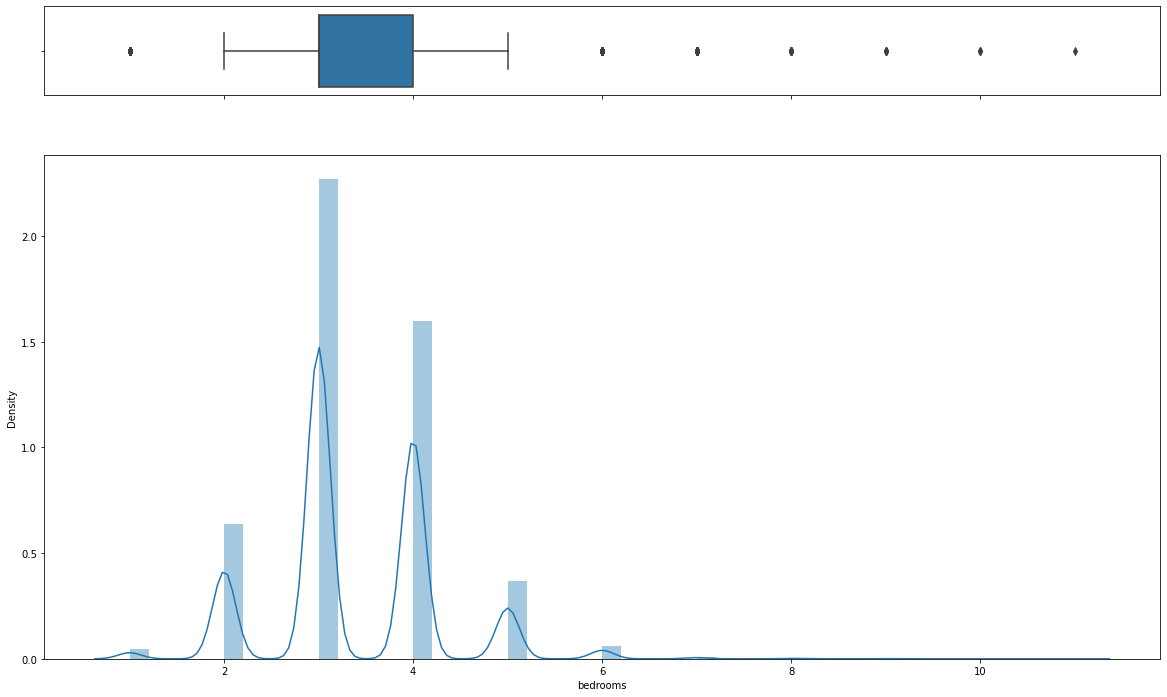

In [367]:
df['bedrooms'].replace({33: 3}, inplace=True)

check_boxplot_and_distplot(df, 'bedrooms')

### cleaning sqft_lot

let's take a look at sqft_lot

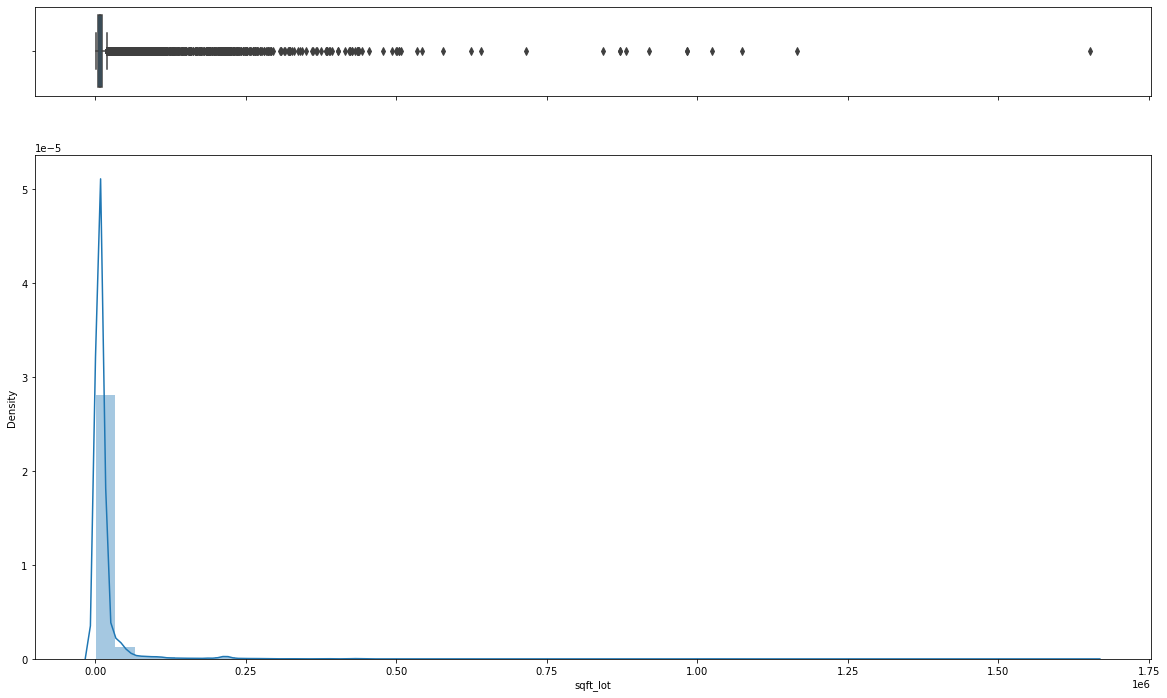

In [368]:
check_boxplot_and_distplot(df_v1, 'sqft_lot')

In [369]:
to_drop = df_v1[df_v1['sqft_lot'] > 1500000]
to_drop

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1717,1020069017,2015-03-27,700000.0,4,1.0,1300,1651359,1.0,0.0,3.0,...,6,1300,0.0,1920,0.0,98022,47.2313,-122.023,2560,425581


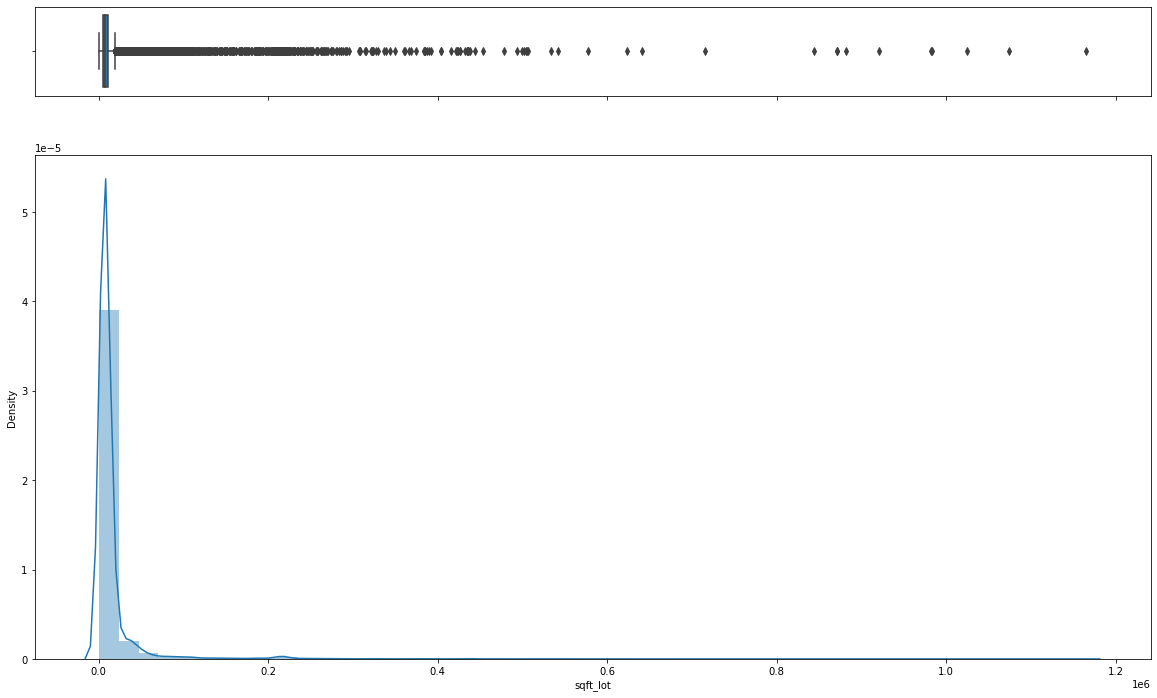

In [370]:
df_v1.drop(to_drop.index, inplace=True)

check_boxplot_and_distplot(df_v1, 'sqft_lot')

### Feature Addition and Deduction

Next, we'll drop features that won't be used in our analysis

**Features to drop**
* **id** - it is a unique identifier, and hencenot useful here on
* **date** - we won't be doing any time series analysis
* **lat**, **long**, **zipcode** we won't be using any geographycal data
* **yr_built** we have used it to find age of house, hence redundant
* **sqft_above**, and **sqft_basement**, height of house, and basement are not really important in this particular analysis
* **yr_renovated**, **sqft_living15**, **sqft_lot15**

In [371]:
#  lets drop the unwanted columns
df_v1.drop(['id', 'date', 'yr_built', 'lat', 'long', 'zipcode', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15','sqft_lot15' ], axis=1, inplace=True)
df_v1

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
0,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,3,7
1,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7
2,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6
3,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7
4,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8
...,...,...,...,...,...,...,...,...,...,...
21592,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,3,8
21593,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,3,8
21594,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,3,7
21595,400000.0,3,2.50,1600,2388,2.0,0.0,0.0,3,8


In [372]:
df_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21416 entries, 0 to 21596
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21416 non-null  float64
 1   bedrooms     21416 non-null  int64  
 2   bathrooms    21416 non-null  float64
 3   sqft_living  21416 non-null  int64  
 4   sqft_lot     21416 non-null  int64  
 5   floors       21416 non-null  float64
 6   waterfront   21416 non-null  float64
 7   view         21416 non-null  float64
 8   condition    21416 non-null  int64  
 9   grade        21416 non-null  int64  
dtypes: float64(5), int64(5)
memory usage: 1.8 MB


## MODELLING
### Train Test Splitting
Now, before building our first model, let's go ahead and split our data into training and testing sets

In [373]:
# Train test split
features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 
            'view', 'condition', 'grade']

X = df_v1.loc[:, features]
y = df_v1.loc[:, ['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [374]:
# Check out our split, to ensure our train and split have same number of rows
print(f'X_train has {X_train.shape[0]} rows and {X_train.shape[1]} columns')
print(f'y_train has {y_train.shape[0]} values')

# check to see if this is so using an assert
assert X_train.shape[0] == y_train.shape[0]

X_train has 16062 rows and 9 columns
y_train has 16062 values


### Model 1 : Base Model

In this model, we will create our model using the feature with the highest correlation with our target (price), to do this, we will plot a correlation heatmap with the above features.

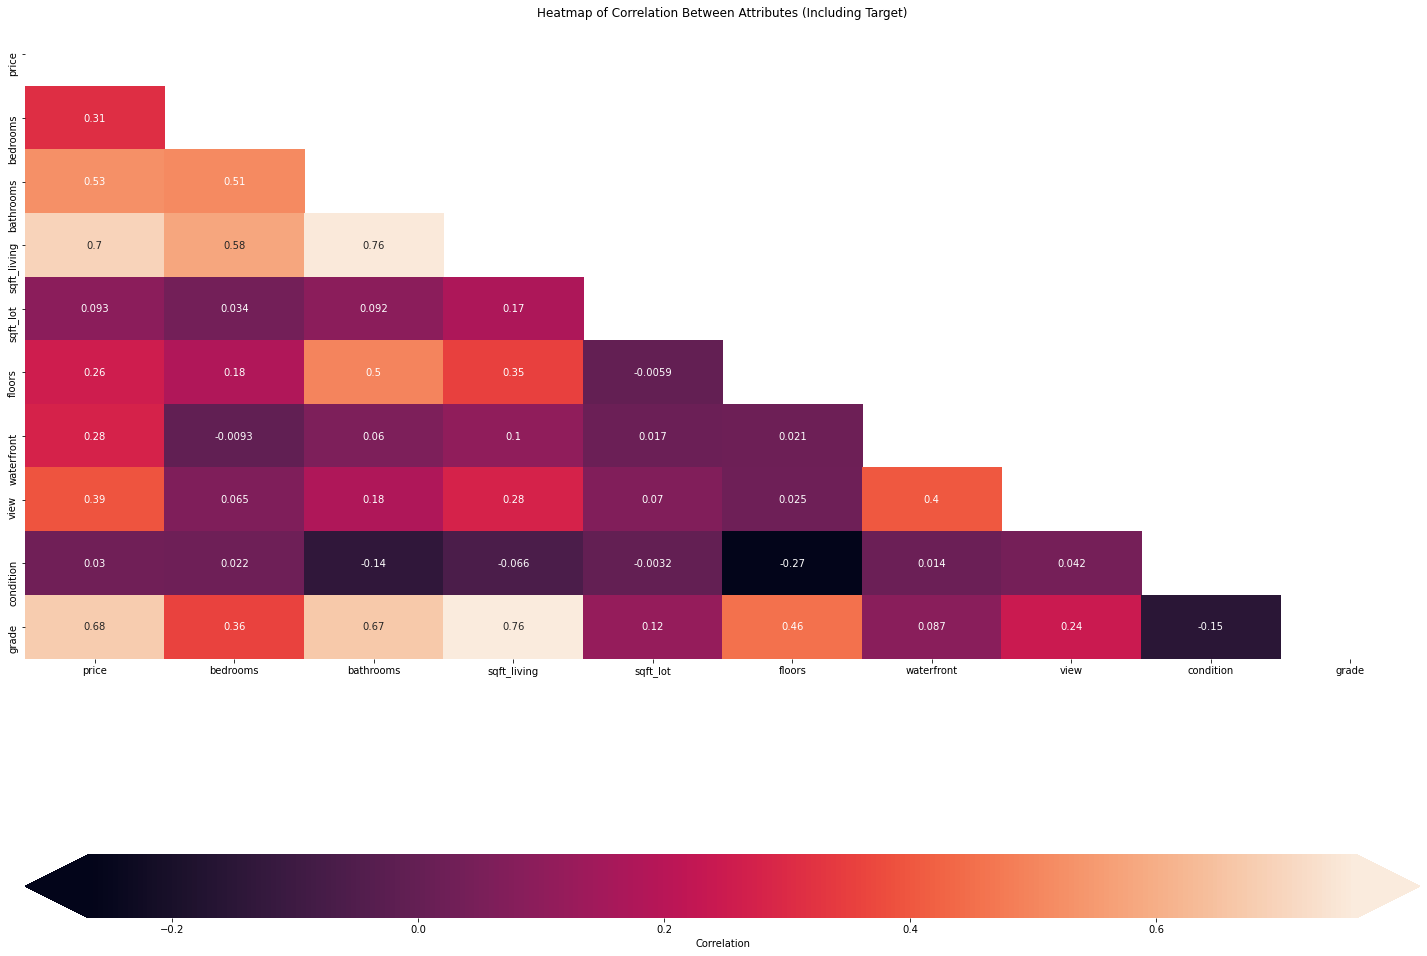

In [375]:
# Create a df with the target as the first column,
# then compute the correlation matrix
heatmap_data = pd.concat([y_train, X_train], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(25, 18))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    # Specifies that we should use the existing axes
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");

From our correlation heatmap, we can see that price has the highest correlation with sqft_living, followed by grade. Let's go ahead and build our first model,(baseline) model using sqft_living

In [376]:
most_correlated_feature = 'sqft_living'

Lets view a scatter plot of price with our most correlated feature

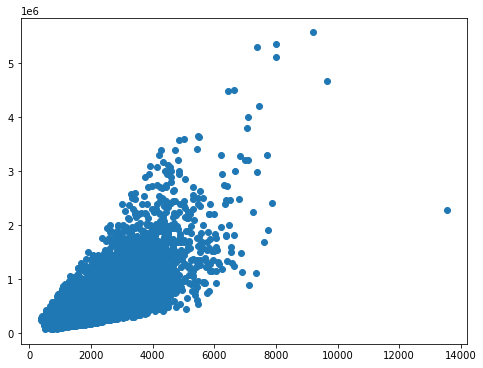

In [377]:
corr_fig, ax = plt.subplots(figsize=(8,6))

x = X_train['sqft_living']
y = y_train

ax.scatter(x,y);

In [378]:
# fitting our mode; usig ols
import statsmodels.api as sm

sm.OLS(y_train, sm.add_constant(X_train['sqft_living'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.486
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                 1.520e+04
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:56:30   Log-Likelihood:            -2.2287e+05
No. Observations:               16062   AIC:                         4.457e+05
Df Residuals:                   16060   BIC:                         4.458e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -2.935e+04   5048.309     -5.813      0.000   -3.92e+04   -1.95e+04
sqft_living   273.6968      2.220    123.304      0.000     269.346     278.048
==============================================================================
Omnibus:                     9584.129   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           204956.193
Skew:                           2.466   Prob(JB):                         0.00
Kurtosis:                      19.790   Cond. No.                     5.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From our results, we can see that by using just the most correlated feature,

* The feature selected(sqft_living) is explaining about half our targets' variance with **R-squared** at **0.49**.
* Our findings are significant, since our p-values at (0.00) is much smaller than our alpha at 0.05.
* Our constant is negative, suggesting that our model is multiplying our independent vaviable negatively.
* Our Condition number is very huge, suggesting some numerical problems in our model

Let's work on improving some of these outcomes

## Model 2 : Transforming and Standardizing the feature

Next, we'll transform the sqft_living feature appropriately, to see if this will lead to an improvement in our model.

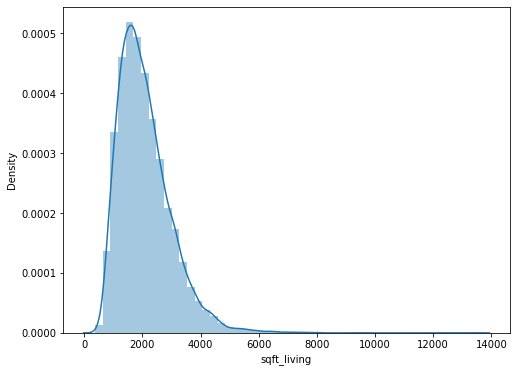

In [379]:
# plot sqft_living distribution
sqft_fig, ax = plt.subplots(figsize=(8,6))

x = X_train['sqft_living']

sns.distplot(x);

We can see from our plot that the sqft_living is skewed towards the left, and a log transform might do some justice in terms of normalizing the distribution.

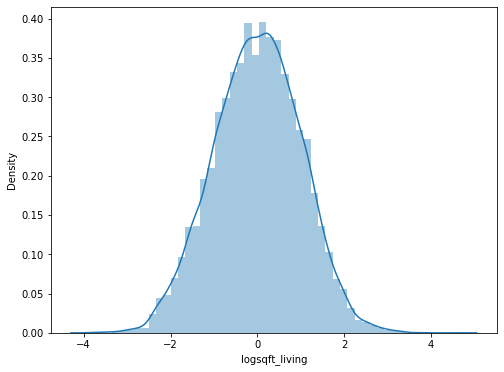

In [380]:
# perform a log transform
X_train_log = X_train.copy()

X_train_log['logsqft_living'] = np.log(X_train['sqft_living'])

# normalize the scale
X_train_log['logsqft_living'] = (X_train_log['logsqft_living'] - X_train_log['logsqft_living'].mean())/X_train_log['logsqft_living'].std()

# plot our histogram
fig, ax = plt.subplots(figsize=(8,6))

x = X_train_log['logsqft_living']

sns.distplot(x);

Niice one, now our data looks much better in terms of following a normal distribution, and is scaled. Let's fit a new model to see if it improves.

In [381]:
sm.OLS(y_train , sm.add_constant(X_train_log['logsqft_living'])).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.378
Model:                            OLS   Adj. R-squared:                  0.378
Method:                 Least Squares   F-statistic:                     9746.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:56:32   Log-Likelihood:            -2.2441e+05
No. Observations:               16062   AIC:                         4.488e+05
Df Residuals:                   16060   BIC:                         4.488e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           5.407e+05   2231.301    242.341      0.000    5.36e+05    5.45e+05
logsqft_living  2.203e+05   2231.370     98.724      0.000    2.16e+05    2.25e+05
==============================================================================
Omnibus:                    12129.315   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           459729.533
Skew:                           3.262   Prob(JB):                         0.00
Kurtosis:                      28.385   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

With a log transformation and min-max scalling on sqft_living, our model 2 actually does way much worse than our base model, droppng from 0.491 all the way down to 0.378.

Our Constant has however gone up greatly, our condition is also at one.
Let's see if we can improve on this model by includung some more features into our model.

## Model 3 : Adding more features to our model

Before  plotting our model, lets first transform our data appropriately, see if there are any features that we might want to drop

In [382]:
X_train_3 = X_train.copy()

for col in X_train_3.columns.to_list():
    X_train_3[col] = (X_train_3[col] - X_train_3[col].mean()) / X_train_3[col].std()

X_train_3.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
14926,1.739376,2.450700,1.836263,0.204187,-0.920222,-0.086392,3.643913,0.913810,2.850380
3886,-1.477912,-1.455956,-1.076191,-0.269452,-0.920222,-0.086392,-0.303161,-0.631528,-0.568161
183,-1.477912,-0.804847,-1.130937,-0.283469,0.937688,-0.086392,-0.303161,-0.631528,-0.568161
5915,-1.477912,-1.455956,-0.791515,1.376361,-0.920222,-0.086392,-0.303161,0.913810,-2.277431
5860,-0.405483,-1.455956,-1.295173,-0.249915,-0.920222,-0.086392,-0.303161,0.913810,-1.422796


after the standardization, let's try and fit our model

In [383]:
sm.OLS(y_train, sm.add_constant(X_train_3)).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2770.
Date:                Mon, 04 Jul 2022   Prob (F-statistic):               0.00
Time:                        06:56:33   Log-Likelihood:            -2.2069e+05
No. Observations:               16062   AIC:                         4.414e+05
Df Residuals:                   16052   BIC:                         4.415e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        5.407e+05   1770.716    305.377      0.000    5.37e+05    5.44e+05
bedrooms    -2.627e+04   2262.662    -11.612      0.000   -3.07e+04   -2.18e+04
bathrooms   -7845.6823   3003.549     -2.612      0.009   -1.37e+04   -1958.391
sqft_living  1.635e+05   3594.047     45.494      0.000    1.56e+05    1.71e+05
sqft_lot    -1.244e+04   1810.955     -6.872      0.000    -1.6e+04   -8895.173
floors      -7120.8257   2168.634     -3.284      0.001   -1.14e+04   -2870.061
waterfront    5.24e+04   1938.108     27.037      0.000    4.86e+04    5.62e+04
view         4.703e+04   2026.985     23.201      0.000    4.31e+04     5.1e+04
condition    3.543e+04   1852.861     19.124      0.000    3.18e+04    3.91e+04
grade        1.261e+05   2960.028     42.595      0.000     1.2e+05    1.32e+05
==============================================================================
Omnibus:                     9252.537   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           237414.341
Skew:                           2.282   Prob(JB):                         0.00
Kurtosis:                      21.273   Cond. No.                         4.43
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

We can see that including all features improves our model by almost double, from 0.378 to o.608.

All our features also have p-values above 0.05.

#### Multicollinearity

let's check for Multicollinearity to identify feature that are highly correlated here, we'll accomplish this using VIF(variance Inflation factor) from statsmodel

In [384]:
# imports
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = X_train_3
vif = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
list(zip(X.columns, vif))


[('bedrooms', 1.6327301379959365),
 ('bathrooms', 2.8770296977380134),
 ('sqft_living', 4.119480902671657),
 ('sqft_lot', 1.0458999185216327),
 ('floors', 1.499848372180311),
 ('waterfront', 1.1979286109494542),
 ('view', 1.3103164628142723),
 ('condition', 1.0948652324347095),
 ('grade', 2.79425937422881)]

All our features have a VIF below 5, which in this case, means we shouldn't worry about multicollinearity.

### Building our final model

In [385]:
# OUr best features
best_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade']

In [386]:
X_train_final = X_train[best_features]
X_test_final = X_test[best_features]

In [387]:
final_model = LinearRegression()

# Fit the model on X_train_final and y_train
final_model.fit(X_train_final, y_train)

# Score the model on X_test_final and y_test
# (use the built-in .score method)
final_model.score(X_test_final, y_test)

0.5966971554363019

## Model Interpretation and Summary
From our base model, we have seen that the features that give us the best model include:
`bedrooms`, `bathrooms`, `sqft_living`, `sqft_lot`, `floors`, `waterfront`, `view`, `condition`, `grade`

This basically means, that when estimating the valuea house, these are the combinations of features that will ultimately give use the price of the house.

Let's go ahead and print out the intercepts and coefficients of our model.

In [388]:
# Check out the intercept and model coefficients.
print(pd.Series(final_model.coef_[0], index=X_train_final.columns, name="Coefficients"))
print()
print("Intercept:", final_model.intercept_)

bedrooms       -28176.540416
bathrooms      -10216.793735
sqft_living       179.026220
sqft_lot           -0.313730
floors         -13229.852822
waterfront     611042.080432
view            61875.613729
condition       54758.538978
grade          107754.521420
Name: Coefficients, dtype: float64

Intercept: [-722306.94779161]
